In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [6]:
df=pd.read_csv("ITSector_1971.csv")

In [7]:
df

,financial_year,Infosys,Wipro,TCS,Oracle,HCL,average,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1971-72,0.0,1.20,24.20,0.00,0.00,5.080,NaN,NaN,NaN
1,1972-73,0.0,2.20,23.60,0.00,0.00,5.160,NaN,NaN,NaN
2,1973-74,0.0,6.10,25.20,0.00,0.00,6.260,NaN,NaN,NaN
3,1974-75,0.0,12.00,30.00,0.00,0.00,8.400,NaN,NaN,NaN
4,1975-76,0.0,15.00,56.00,0.00,1.20,14.440,NaN,NaN,NaN
5,1976-77,0.0,21.00,120.00,0.00,2.20,28.640,NaN,NaN,NaN
6,1977-78,0.0,24.00,32.00,0.00,6.10,12.420,NaN,NaN,NaN
7,1978-79,0.0,30.90,190.00,0.00,12.00,46.580,NaN,NaN,NaN
8,1979-80,0.0,35.60,210.90,0.00,15.00,52.300,NaN,NaN,NaN
9,1980-81,0.0,32.00,158.20,0.00,21.00,42.240,NaN,NaN,NaN


In [8]:
df=df.drop(["Infosys","Wipro","TCS","Oracle","HCL","Unnamed: 7","Unnamed: 8","Unnamed: 9"],axis=1)
df

,financial_year,average
0,1971-72,5.080
1,1972-73,5.160
2,1973-74,6.260
3,1974-75,8.400
4,1975-76,14.440
5,1976-77,28.640
6,1977-78,12.420
7,1978-79,46.580
8,1979-80,52.300
9,1980-81,42.240


In [9]:
df.set_index('financial_year',inplace=True)
df.head()

,average
financial_year,
1971-72,5.08
1972-73,5.16
1973-74,6.26
1974-75,8.40
1975-76,14.44


In [10]:
df.describe()

,average
count,51.000000
mean,795.902980
std,1329.652359
min,5.080000
25%,75.410000
50%,156.680000
75%,448.960000
max,4740.408000


<AxesSubplot:xlabel='financial_year'>

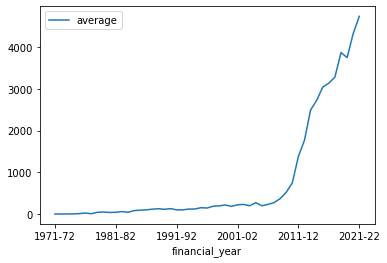

In [11]:
df.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df['average'], autolag='AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value", dftest[1])
print("3. Num of Lags: ", dftest[2]) 
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])
print("5. Critical Values :") 
for key, val in dftest[4].items():
    print("\t", key, ":", val)

1. ADF :  5.270749471139583
2. P-Value 1.0
3. Num of Lags:  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 42
5. Critical Values :
	 1% : -3.596635636000432
	 5% : -2.933297331821618
	 10% : -2.6049909750566895


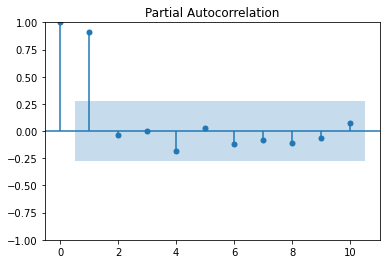

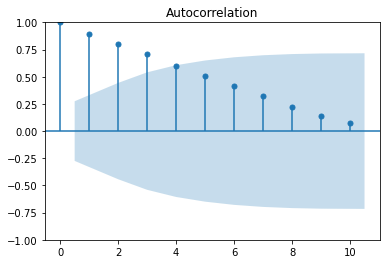

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf=plot_pacf(df["average"],lags=10)
acf=plot_acf(df["average"],lags=10)

In [39]:
train=df[:len("average")-15]
test=df[len("average")-10:]

In [49]:
model=AutoReg(train,lags=2).fit()

C:\Users\christo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                average   No. Observations:                   43
Model:                     AutoReg(2)   Log Likelihood                -234.083
Method:               Conditional MLE   S.D. of innovations             72.996
Date:                Fri, 27 Jan 2023   AIC                            476.166
Time:                        03:55:31   BIC                            483.021
Sample:                             2   HQIC                           478.662
                                   43                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1154     14.994     -2.475      0.013     -66.504      -7.727
average.L1     1.2854      0.155      8.298      0.000       0.982       1.589
average.L2     0.1870      0.222      0.844      0.3

In [51]:
print(len(train))

43


In [52]:
pred=model.predict(start=20,end=50,dynamic=False)

C:\Users\christo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\christo\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


20      157.234270
21      123.146262
22      116.971248
23      140.693556
24      146.352858
25      187.613449
26      182.976773
27      237.375657
28      255.409155
29      284.967469
30      246.043554
31      289.104534
32      306.126013
33      267.673360
34      356.285353
35      275.064369
36      302.766230
37      364.594284
38      494.667350
39      707.077777
40     1028.410402
41     1886.745946
42     2503.092019
43     3503.513881
44     4932.920280
45     6958.507387
46     9829.369170
47    13898.179881
48    19664.825473
49    27837.778129
50    39421.142289
dtype: float64


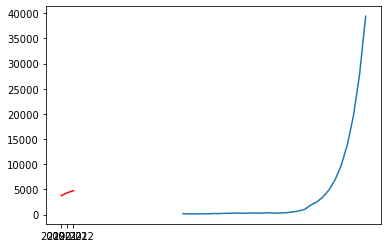

In [53]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)